# Clustering - KMeans 1
Task: Given this set of customer data, group the customers into customer segments for targeted marketing and product recommendations.  We do NOT have any historical labels for these customers.

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Load data

In [2]:
df = pd.read_csv("data/Mall_Customers.csv")
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


### Examine data

In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64

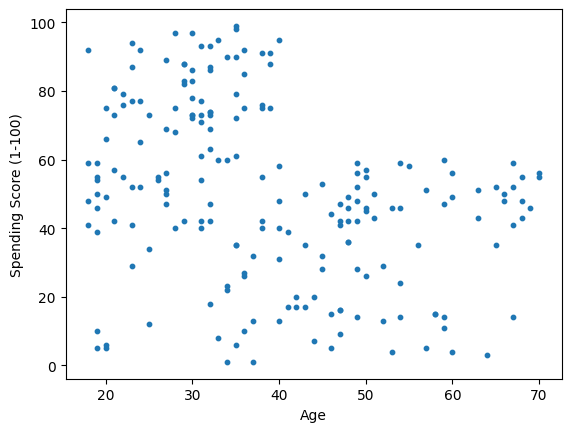

In [5]:
# Compare age to spending score
plt.scatter(df["Age"], df["Spending Score (1-100)"], s=10)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

The plot above implies two customer segments

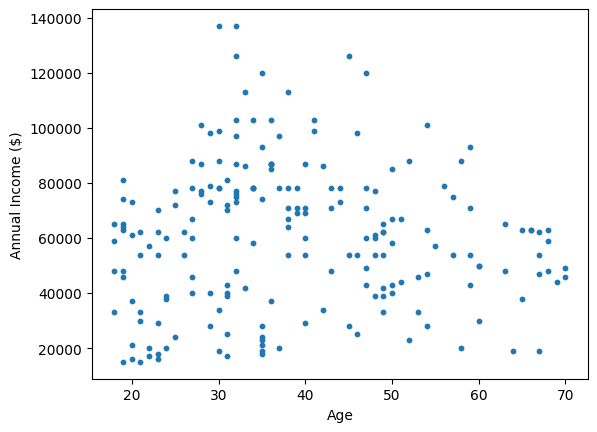

In [6]:
# Compare age to annual income
plt.scatter(df["Age"], df["Annual Income ($)"], s=10)
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
plt.show()

According to the plot above, there are no obvious customer segments

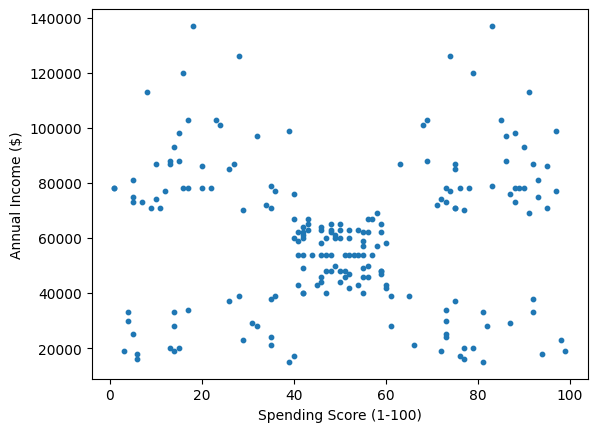

In [7]:
# Compare spending score to annual income
plt.scatter(df["Spending Score (1-100)"], df["Annual Income ($)"], s=10)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income ($)")
plt.show()

The plot above implies five customer segments

### Prepare data

In [8]:
# Drop unnecessary columns
df.drop(['CustomerID', 'Genre'], axis=1, inplace=True)
df.head()

,Age,Annual Income ($),Spending Score (1-100)
0,19,15000,39
1,21,15000,81
2,20,16000,6
3,23,16000,77
4,31,17000,40


#### Scale variables

In [9]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [10]:
type(scaled_data)

numpy.ndarray

### Train KMeans classifier

In [11]:
# n_clusters default = 8
# n_init = # of times KMeans is run with different centroid seeds
KM = KMeans(n_init=10, random_state=42)
KM.fit(scaled_data)

KMeans(n_init=10, random_state=42)

### Review results

In [12]:
KM.cluster_centers_

array([[-1.01191032, -0.18240216, -0.02717509],
       [ 1.86593393, -0.28283547, -0.01358755],
       [ 0.7284319 ,  1.06072844, -1.20540946],
       [-0.44191719,  0.99158305,  1.23950275],
       [-0.99396865, -1.34734766,  1.06404834],
       [ 0.47007182, -1.33249477, -1.2287024 ],
       [-0.55311613,  1.09644412, -1.43029722],
       [ 0.59162665, -0.19075172, -0.09268648]])

### Determine the optimal K value

In [13]:
# Create function to find the optimal K value
def find_optimal_k(df, maximum_K=12):
    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):
        KM = KMeans(n_clusters=k, n_init=10, random_state=42)
        KM.fit(df)

        clusters_centers.append(KM.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [14]:
# Create function to generate elbow plot
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'red')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [15]:
# Execute function to find optimal K value
clusters_centers, k_values = find_optimal_k(scaled_data)

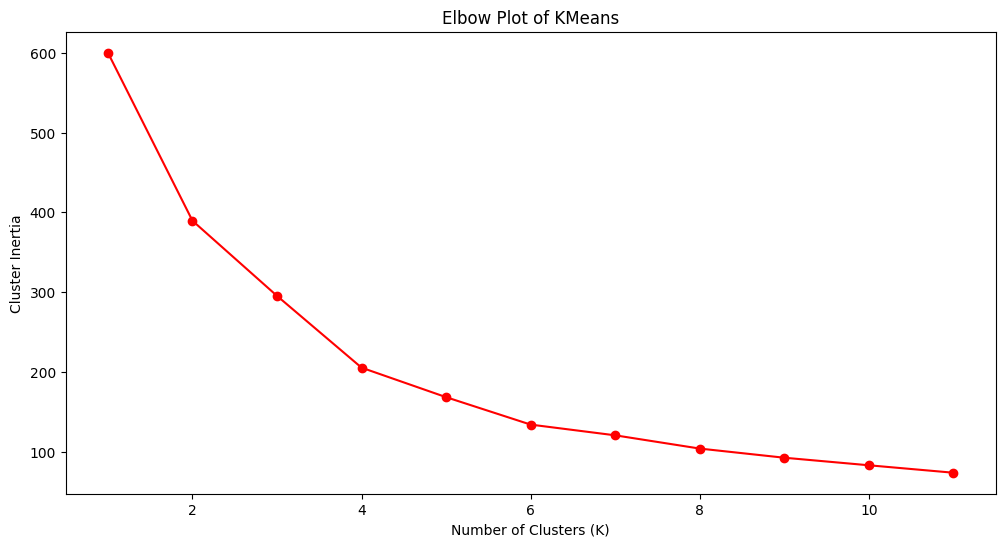

In [16]:
# Display elbow plot
generate_elbow_plot(clusters_centers, k_values)

From the plot above, it seems that 5 is the optimal K value

### Re-train KMeans classifier with optimal K value

In [17]:
KM = KMeans(n_clusters=5, n_init=10, random_state=42)
KM.fit(scaled_data)

KMeans(n_clusters=5, n_init=10, random_state=42)

### Review re-training results

In [18]:
# Add cluster # to original dataframe
df["Clusters"] = KM.labels_
df["Clusters"].unique()

array([2, 3, 0, 4, 1], dtype=int32)

In [19]:
df.head()

,Age,Annual Income ($),Spending Score (1-100),Clusters
0,19,15000,39,2
1,21,15000,81,2
2,20,16000,6,3
3,23,16000,77,2
4,31,17000,40,2


### Visualize the clusters

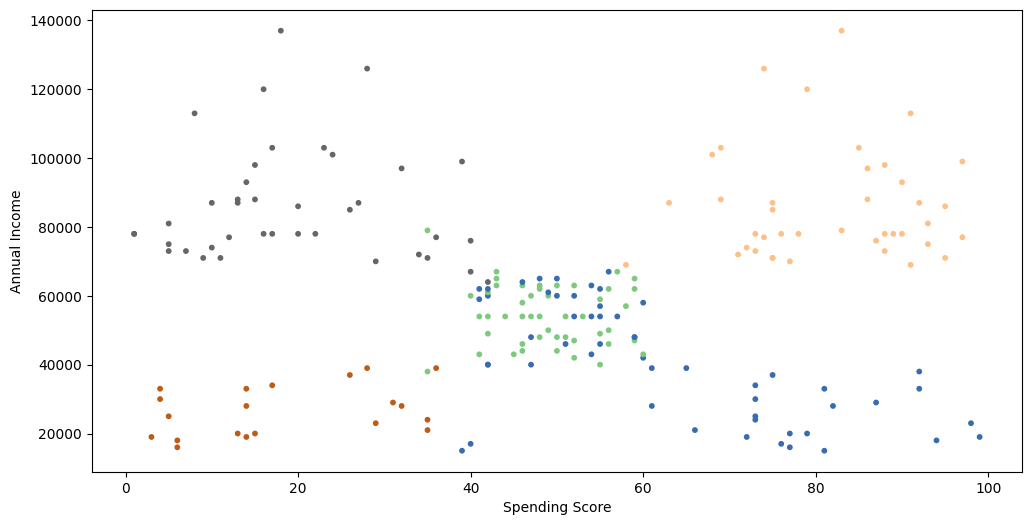

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(df["Spending Score (1-100)"], df["Annual Income ($)"], 
            c = df["Clusters"], cmap='Accent', s=10)
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()